# Rede Convolucional Classificação de Dígitos

### Bruno Oliveira

# 2. Conjunto de dados
Para exemplificar a configuração e treinamento de uma rede convolucional no Keras será resolvido um
problema de classificação multiclasse usando o conjunto de dados MINIST de dígitos.

## 2.1 Importação das principais bibliotecas

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.3.0


## 2.2 Importação do conjunto de dados MNIST de dígitos

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('Dimensão dos dados de entrada de treinamento =', x_train.shape)
print('Dimensão dos dados de entrada de teste =', x_test.shape)
print('Dimensão dos dados de saída de treinamento =', y_train.shape)
print('Dimensão dos dados de saída de teste =', y_test.shape)

Dimensão dos dados de entrada de treinamento = (60000, 28, 28)
Dimensão dos dados de entrada de teste = (10000, 28, 28)
Dimensão dos dados de saída de treinamento = (60000,)
Dimensão dos dados de saída de teste = (10000,)


É uma figura do número 0


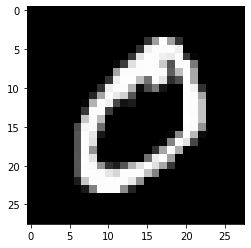

In [4]:
# Exemplo de uma imagem
index = 1
plt.imshow(x_train[index], cmap='gray', vmin=0, vmax=255)
print ("É uma figura do número " + str(y_train[index]))

## 2.3 Inclusão do eixo de cores e normalização das imagens

In [5]:
# Determina número de exemplos
nx = x_train.shape[0]

# Inclui eixo de cores nas imagens
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

# Determina dimensões das imagens
img_dim = x_train.shape[1:]
print('Dimensão das imagens =', img_dim)

# Normaliza imagens
x_train = x_train/255.
x_test = x_test/255.
print('Dimensão dos dados de entrada de treinamento =', x_train.shape)
print('Dimensão dos dados de entrada de teste =', x_test.shape)

Dimensão das imagens = (28, 28, 1)
Dimensão dos dados de entrada de treinamento = (60000, 28, 28, 1)
Dimensão dos dados de entrada de teste = (10000, 28, 28, 1)


In [6]:
print(np.min(x_train), np.max(x_train))

0.0 1.0


## 2.4 Codificação one-hot das saídas

In [7]:
print('Classes das imagens:', y_train[:10])

Classes das imagens: [5 0 4 1 9 2 1 3 1 4]


In [8]:
# Importa classe de utilidades do Keras
from tensorflow.keras.utils import to_categorical

# Transformação das classes de números reais para vetores
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print('Dimensão dos dados de saída do conjunto de treinamento: ', y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', y_test_hot.shape)
print('Classe numérica:', y_train[:5])
print('Classe como vetor one-hot:\n', y_train_hot[:5])

Dimensão dos dados de saída do conjunto de treinamento:  (60000, 10)
Dimensão dos dados de saída do conjunto de teste:  (10000, 10)
Classe numérica: [5 0 4 1 9]
Classe como vetor one-hot:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# 3.Configuração de uma RNA convolucional

A configuração de uma RNA convolucional usando o Keras segue os mesmos princípios usados para as redes
com camadas densas.

## 3.1 Rede LeNet-5

Como exemplo a rede LeNet-5, que é usada para classificação multi-classe, possui a seguinte arquitetura:

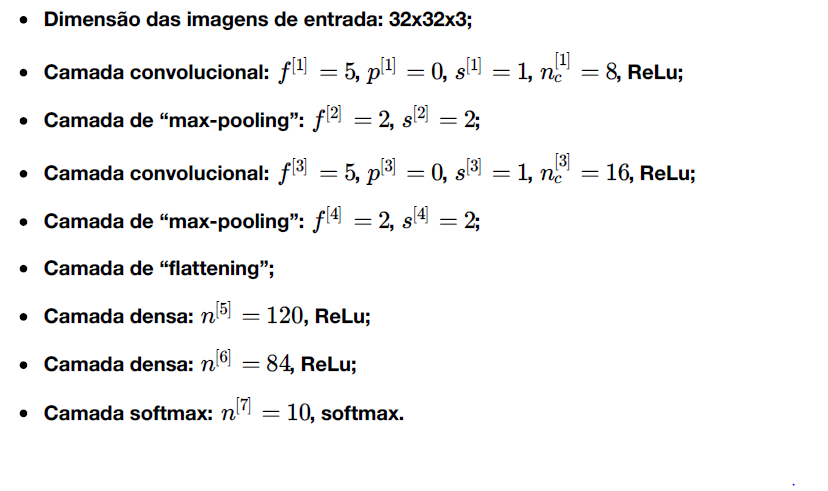

### Arquitetura da RN LeNet-5

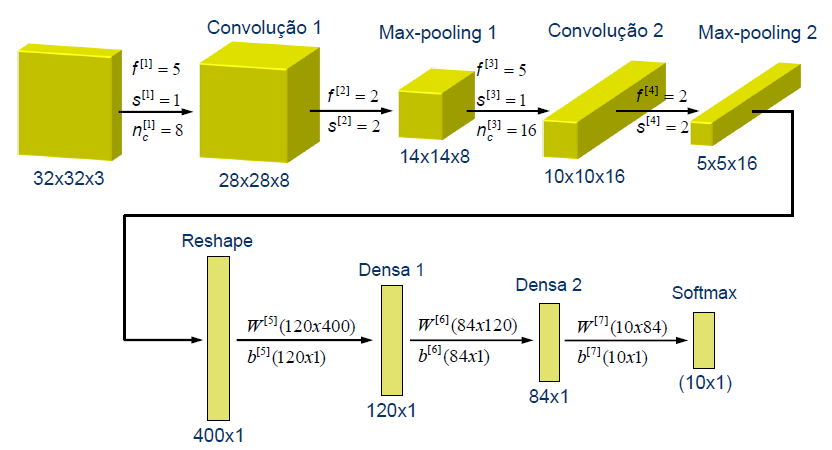

O código a seguir apresenta como configurar as duas camadas convolucionais e as duas camadas de “pooling”
da rede LeNet-5.

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

rna = models.Sequential()
rna.add(layers.Conv2D(8, (5, 5), strides=1, padding='valid', activation='relu', input_shape=img_dim))  #5x5x8 + 8 = 208
rna.add(layers.MaxPooling2D((2, 2)))
rna.add(layers.Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu'))
rna.add(layers.MaxPooling2D((2, 2)))

rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
Total params: 3,424
Trainable params: 3,424
Non-trainable params: 0
_________________________________________________________________


- Npar = 5 * 5 * 8 * 16 + 16 = 3216

- Note que o número de filtros (número de canais) é o primeiro argumento passado na adição da camada convolucional.

- Na camada de “pooling” o primeiro valor é a dimensão da janela e o segundo é o “stride”.

- O padrão das camadas convolucionais no Keras é e (“valid”), assim, se esse for o caso não precisaria incluir essas informações.

### Falta adicionar na RNA a camada de “flattening” e as camadas densas. O código a seguir mostra como fazer essa etapa.

In [10]:
rna.add(layers.Flatten())
rna.add(layers.Dense(120, activation='relu'))
rna.add(layers.Dense(84, activation='relu'))
rna.add(layers.Dense(10, activation='softmax'))

rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### O redimensionamento da saída da última camada convolucional para transformar o tensor 3D em um vetor é realizada pela camada Flatten .

Um esquema da rede é realizado abaixo.

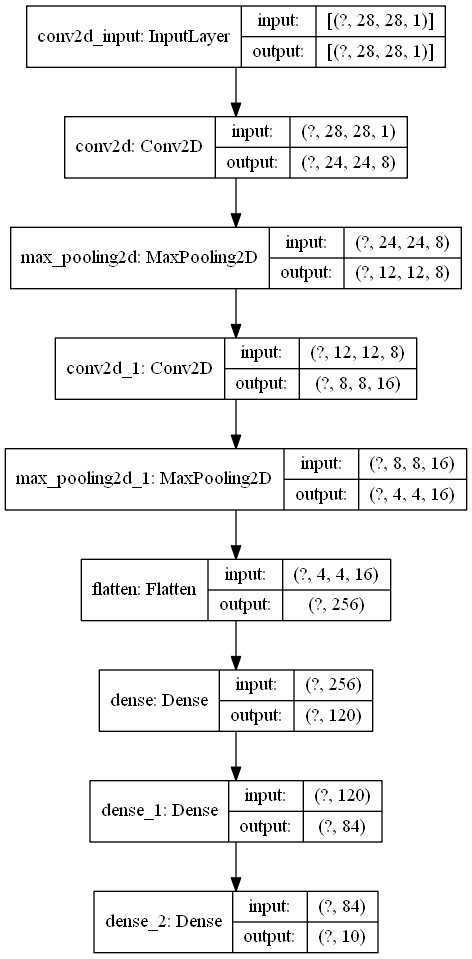

In [11]:
# Importa função para fazer gráfico de RNAs
from tensorflow.keras.utils import plot_model

# Cria um arquivo com o esquema da VGG16
plot_model(rna, to_file='rna.png', show_shapes=True)

#to_file = salva imagem em um arquivo
#show_shape = mostra dimensão dos tensores

# 4. Compilação e treinamento
A compilação e treinamento de uma RNA convolucional no Keras é realizada exatamente como nas redes com
somente camadas densas.

Na célula abaixo é feita a compilação da RN usando o método de otimização RMSprop, com todos os
parâmetros padrão.

In [12]:
rna.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Na célula abaixo é realizado o treinamento da RN com 20 épocas de treinamento.

In [13]:
history = rna.fit(x_train, y_train_hot, epochs=20, verbose=1, validation_data=(x_test, y_test_hot))

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1816 - accuracy: 0.9443 - val_loss: 0.0672 - val_accuracy: 0.9783
Epoch 2/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0629 - accuracy: 0.9804 - val_loss: 0.0391 - val_accuracy: 0.9872
Epoch 3/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0472 - accuracy: 0.9859 - val_loss: 0.0391 - val_accuracy: 0.9876
Epoch 4/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0327 - val_accuracy: 0.9898
Epoch 5/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 6/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0447 - val_accuracy: 0.9883
Epoch 7/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0264 - accuracy: 0.9925 - val_loss: 0.0378 -

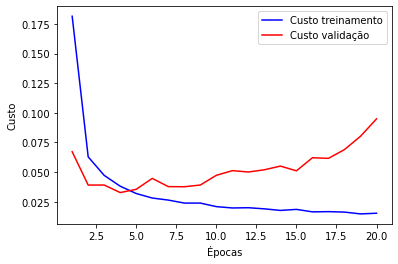

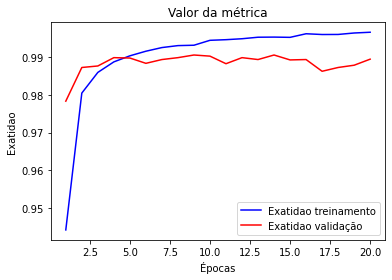

In [14]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores
custo = history_dict['loss']
acc = history_dict['accuracy']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'b', label='Custo treinamento')
plt.plot(epocas, val_custo, 'r', label='Custo validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'b', label='Exatidao treinamento')
plt.plot(epocas, val_acc, 'r', label='Exatidao validação')
plt.title('Valor da métrica')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

# 5. Avaliação e teste da RN treinada


## 5.1 Avaliação do desempenho

In [15]:
# Avaliação da RN para os dados de treinamento e teste
custo_e_metricas_train = rna.evaluate(x_train, y_train_hot)
custo_e_metricas_test = rna.evaluate(x_test, y_test_hot)

313/313 [==============================] - 2s 7ms/step - loss: 0.0950 - accuracy: 0.9894


## 5.2 Avaliação das previsões

Note que a previsão da RNA é um vetor de 10 elementos com as probabilidades da imagem mostrar os 10 dígitos. Para detereminar a classe prevista deve-se transformar esse vetor em um número inteiro de 0 a 9, que representa o dígito sendo mostrado.

[3.5647158e-29 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


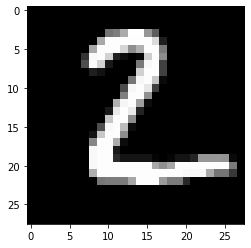

classe prevista = 2
classe real = 2


In [16]:
# Calculo das previsões da RNA
y_pred = rna.predict(x_test)

# Seleção da imagem
index = 1
print(y_pred[index])

# Cálculo das classes previstas
classe = np.argmax(y_pred, axis=1)

# Exemplo de uma imagem dos dados de teste
plt.imshow(np.squeeze(x_test[index]), cmap='gray')
plt.show()
print ("classe prevista = " + str(np.squeeze(classe[index])))
print ("classe real = " + str(np.squeeze(y_test[index])))

Cálculo das previsões da RNA para as imagens dos dados de teste e verificação se algumas dessas previsões 
estão corretas.

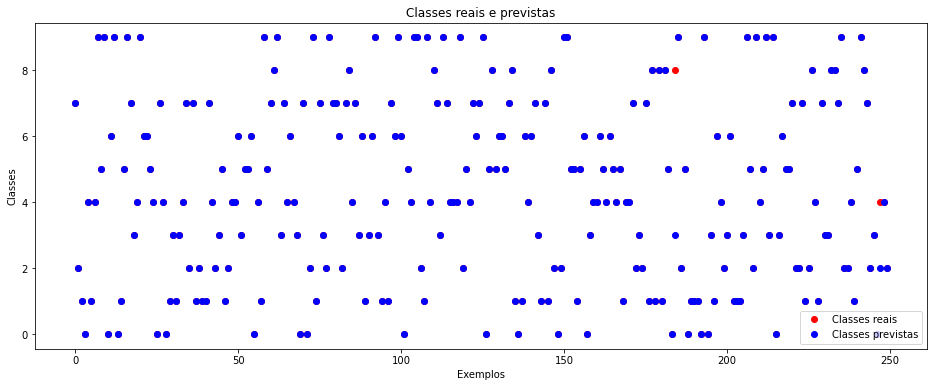

In [17]:
# Calculo das previsões da RNA
y_test_prev = rna.predict(x_test)

# Cálculo das classes previstas
classe = np.argmax(y_test_prev, axis=1)

# Gráfico das classes reais e previstas (100 primeiros exemplos)
plt.figure(figsize=(16, 6))
plt.plot(y_test[:250], 'ro', label='Classes reais')
plt.plot(classe[:250], 'bo', label='Classes previstas')
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show()

# 6. Visualização do aprendizado

A visualização das saídas das camadas convolucionais de uma RNA é importante para entender o que de fato a
rede aprendeu e o que está fazendo para processar os dados.

Existem várias formas de visualização e interpretação dos resultados de uma RNA convolucional. As três
formas mais utilizadas são:

- Visualização das saídas das camadas intermediárias da rede ➜ útil para entender como as sucessivas camadas convolucionais transformam suas entradas e entender o que realiza cada filtro da camada;


- Visualização dos filtros ➜ útil para entender cada padrão que a rede é capaz de detectar e conhecer os filtros que a rede aprendeu;


- Visualização de mapas de calor ou de ativação de classes ➜ útil para entender que parte de uma imagem é identificada como sendo de uma dada classe, de forma a permitir localizar objetos nas imagens.

#Mostra todas as variáveis da rede
rna.variables[0]

## 6.1 Visualização das saídas das camadas

A visualização das ativações das camadas convolucionais intermediárias de uma RNA consiste em mostrar os
mapas de características que são produzidas pelos filtros para uma dada entrada da rede.
Essa visualização permite verificar como uma dada entrada é decomposta pelos diversos filtros aprendidos pela
RNA.

A saída de cada camada convolucional é um tensor 3D, onde se tem um número de “imagens” igual ao número
de canais (filtros) da camada.
Cada canal (filtro) de um camada convolucional codifica de forma independente características diferentes de
forma que a melhor forma de visualização é fazer o gráfico da saída de cada filtro como se fosse uma imagem
2D.

Para fazer isso, temos que realizar alguns passos:

1. O primeiro passo é carregar uma RNA já treinada;


2. Gerar um modelo do Keras que permite múltiplas saídas;


3. Obter uma imagem de teste ➜ obviamente que essa imagem deve ser processada da mesma forma como foram processadas as imagens usadas no treinamento.


4. Executar a nova RNA em modo de predição;


5. Fazer gráficos das sáidas.

## Obter modelo de RN já treinada

Como acabamos de treinar uma RN, vamos usá-la para essa visualização. Copiando-a com outro nome.

In [18]:
rna_vis = tf.keras.models.clone_model(rna)
rna_vis.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Gerar modelo com múltiplas saídas

Para visualizar as saídas das camadas de uma RNA deve-se criar um modelo Keras que recebe uma imagem como entrada e gera como saída as ativações das camadas que se deseja visualizar ➜ a classe de modelos Funcional do Keras permite construir redes desse tipo.


Esse tipo de modelo é equivalente ao modelo sequencial de uma RNA, mas pode ter múltiplas entradas e
múltiplas saídas.


Observa-se que no caso geral uma RNA pode ter qualquer número de entradas e saídas.


Esse tipo de modelo é criado usando dois argumentos ➜ uma lista de tensores de entrada e uma lista de
tensores de saída.

In [19]:
# Importa classe de modelos do keras
from tensorflow.keras import models

# Define as saídas como sendo as ativações das 4 primeiras camadas da RNA
camadas_saidas = [layer.output for layer in rna.layers[:4]] #pega 4 primeiras camadas da RNA (sem camadas densas)
#camadas_saidas = ['conv2d_2', 'conv2d_3']

# Cria o modelo que retorna as ativações das camadas, dada uma entrada
rna_ativacoes = models.Model(inputs=rna.input, outputs=camadas_saidas)
rna_ativacoes.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
Total params: 3,424
Trainable params: 3,424
Non-trainable params: 0
_________________________________________________________________


- Quando esse modelo recebe uma imagem de entrada, ele retorna as ativações das camadas da RNA original.

- No caso dessa RNA tem-se uma entrada e quatro saídas (uma saída para cada conjunto de ativações de uma camada).

### Obter uma imagem de teste
A imagem usada como entrada dessa nova RNA deve ser um tensor de mesmo tamanho que o usado na RNA original.


No caso de ser uma imagem colorida, ela tem 3 eixos (altura, largura, cor) e o tensor de entrada da RNA tem 4 eixos(exemplo, altura, largura, cor) portanto, deve-se incluir um quarto eixo na imagem antes dela ser usada como entrada da RNA.

É uma figura do número 4


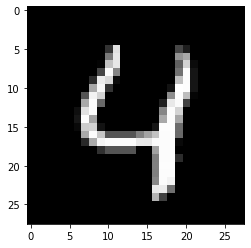

Dimensão da imagem com o eixo dos exemplos = (1, 28, 28, 1)


In [20]:
# Escolhe imagem do conjunto de teste
index = 4
imagem = x_test[index]
plt.imshow(np.squeeze(imagem), cmap='gray')
print ("É uma figura do número " + str(y_test[index]))
plt.show()

# Inclui eixo dos exemplos na imagem
imagem = np.expand_dims(imagem, 0)
print('Dimensão da imagem com o eixo dos exemplos =', imagem.shape)

### Prever saídas da RNA
O código abaixo executa a rna_ativacoes e separa as ativações das várias camadas em tensores.

In [21]:
# Calcula saídas da RNA (saídas das 4 primeiras camadas)
ativacoes = rna_ativacoes.predict(imagem)

# Separa ativações das camadas em tensores
first_layer = ativacoes[0]
sec_layer = ativacoes[1]
trd_layer = ativacoes[2]
four_layer = ativacoes[3]

print("Dimensão do tensor de saída da primeira camada convolucional =", first_layer.shape)
print("Dimensão do tensor de saída da segunda camada maxpooling =", sec_layer.shape)
print("Dimensão do tensor de saída da terceira camada convolucional =", trd_layer.shape)
print("Dimensão do tensor de saída da quarta camada pooling =", four_layer.shape)

Dimensão do tensor de saída da primeira camada convolucional = (1, 24, 24, 8)
Dimensão do tensor de saída da segunda camada maxpooling = (1, 12, 12, 8)
Dimensão do tensor de saída da terceira camada convolucional = (1, 8, 8, 16)
Dimensão do tensor de saída da quarta camada pooling = (1, 4, 4, 16)


- A saída da 1ª camada convolucional é um mapa de características de dimensão 24x24 com 8 canais.


- A saída da 2ª camada convolucional é um mapa de características de dimensão 12x12 com 8 canais.


- A saída da 3ª camada convolucional é um mapa de características de dimensão 8x8 com 16 canais.


- A saída da 4ª camada convolucional é um mapa de características de dimensão 4x4 com 16 canais.

### Visualização das ativações
As ativações do primeiro filtro da 1ª camada convolucional são visualizadas da seguinte forma.

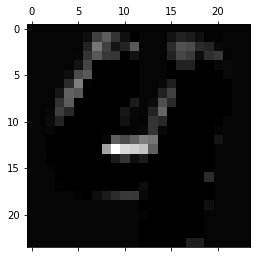

In [22]:
index = 0
plt.matshow(first_layer[0,:,:,index], cmap='gray')

Visulização das saídas de todos os filtros de todas as camadas convolucionais e max-polling para a imagem de
entrada.

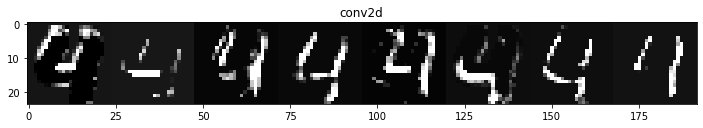

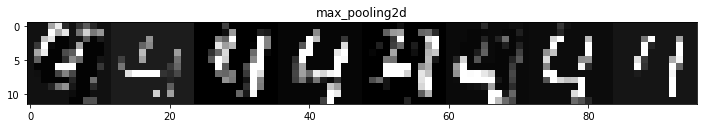

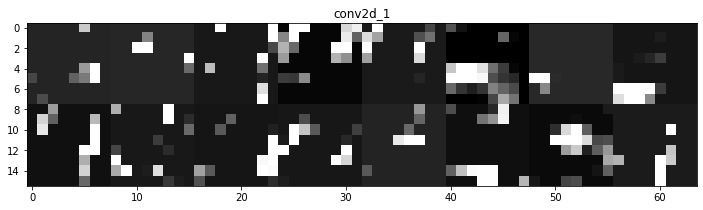

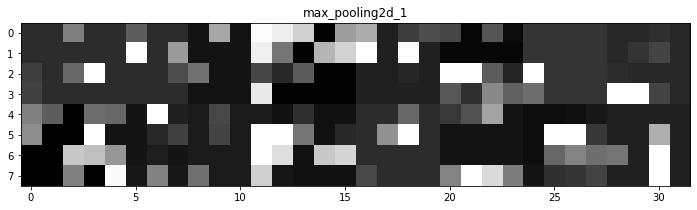

In [24]:
# Visualização de todos os canais das saídas das camadas convolucionais selecionadas
layer_names = []
for layer in rna.layers[:4]:
    layer_names.append(layer.name)
    
images_per_row = 8
for layer_name, layer_activation in zip(layer_names, ativacoes):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    scale = 1.5 / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

# 7.Conclusões
Em geral as primeiras camadas de uma RNA convolucional agem como uma coleção de detectores de vários
tipos de bordas.


Nas primeiras camadas a ativações contém quase toda a informação presente na imagem original. Na medida que avançamos para dentro da rede, as ativações se tornam mais abstratas e com menor significado visual e começam a codificar características de alto nível.


Características de níveis mais alto contém menos informação visual e mais informações relacionadas com a tarefa a ser realizada.


A não ativação de filtros aumenta com a profundidade da camada ➔ na 1ª camada praticamente todos os filtros são ativados, mas nas camadas mais profundas menos filtros ficam ativos.


Quando um filtro não é ativado por uma imagem significa que o padrão codificado por aquele filtro não está presente naquela imagem.


Uma característica importante das RNAs convolucionais deep learning é que as características aprendidas pelas suas camadas se tornam cada vez mais abstratas com a profundidade da camada. As ativações de camadas mais profundas contém menos informação visual e mais informação sobre a tarefa a ser realizada.


Uma RNA deep learning age efetivamente como um destilador de informação, onde dados brutos são repetidamente transformados de forma que informações irrelevantes são descartadas e informações importantes são ressaltadas e refinadas.


A forma que uma RNA convolucional deep learning opera é análoga à forma como os seres humanos e animais percebem o mundo ➔ após observar uma cena por alguns segundos uma pessoa pode lembrar quais objetos estavam presentes (bicicleta, árvore, carro etc), mas não é capaz de lembrar de aspectos específicos desses objetos.


O cérebro humano é treinado para abstrair as imagens vistas e transformá-las em conceitos visual de alto nível, descartando detalhes visuais irrelevantes.
